## Exercise 2 - **Car travel in 2 dimensions**

The goal of this exercise is to familiarise with:
- code structure `# Physics, # Numerics, # Time loop, # Visualisation`
- array initialisation
- 2 spatial dimensions
- solving ODEs

Based on the experience you acquired solving the [Exercise 1](#exercise_1_-_car_travel) we can now consider a car moving within a 2-dimensional space. The car still travels at speed $V=113$ km/h, but now in North-East or North-West direction. The car's displacement in the West-East directions ($x$-axis) is limited to $L=200$ km. The speed in the North direction is constant remains constant.

Starting from the 1D code done in [Exercise 1](#exercise_1_-_car_travel), work towards adding the second spatial dimension. Now, the car's position $(x,y)$ as function of time $t$ has two components.

> 💡 hint:
> - Split velocity magnitude $V$ into $x$ and $y$ component
> - Use `sind()` or `cosd()` functions if passing the angle in _deg_ instead of _rad_
> - Use two vectors or an array to store the car's coordinates
> - Define the y-axis extend in the plot `ylims=(0, ttot*Vy)`

## Code

In [1]:
# needed packages
using Plots

In [33]:
@views function car_travel_2D(V::R, ttot::R, L::R, dt::R) where R <: Real

    # induced numerical parameters
    nt = Int(cld(ttot, dt)) # no. steps

    Vx = V * cosd(45)   # east - west direction   => speed changes when hit the limit L 
    Vy = V * sind(45)   # north - south direction => speed remains constant


    # Array initialisation
    T   = Array{Float64}(undef, nt)
    P_X = Array{Float64}(undef, nt)
    P_Y = Array{Float64}(undef, nt)

    T[1]   = 0.
    P_X[1] = 0. 
    P_Y[1] = 0.
    
    # Time loop
    for i = 2:nt
        T[i] = T[i-1] + dt
        
        P_X[i] = P_X[i-1] + Vx * dt  # move the car east-west 
        P_Y[i] = P_Y[i-1] + Vy * dt  # move the car north-south

        if P_X[i] > L
            Vx = -Vx    # if beyond L, go back (left)

        elseif P_X[i] < 0
            Vx = -Vx    # if beyond 0, go back (right)
            end
    end

    # Visualisation
    display(scatter3d(P_X,P_Y, T, markersize=1,
                    xlabel="x-axis, km", ylabel="y-axis, km", zlabel="time, h", title=("Time step dt = " * string(dt)),
                    framestyle=:box, legend=:none))
    return

end

car_travel_2D (generic function with 2 methods)

### Question 1

Visualise graphically the trajectory of the travelling car for a simulation with time step parameter defined as `dt = 0.1`.

### Answer 1

We use the same parameters as used in ex01 but note that V is the speed in diagonal direction

In [37]:
# Physical parameters
V = 113.   # speed km/h
ttot = 16. # total time 16 h
L = 200.   # distance limit 200 km

200.0

Our function implemented the visualization of the position function using scatter3d method of Plots.jl

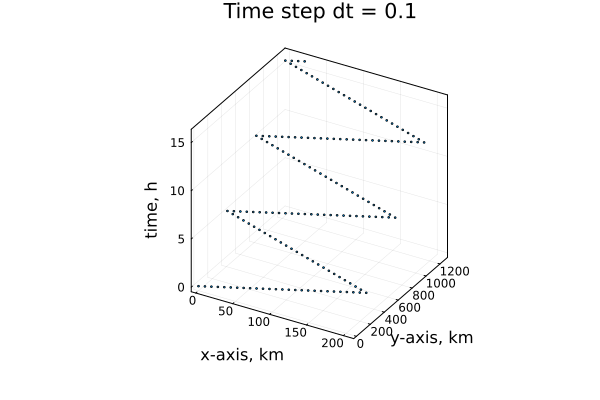

In [40]:
# passed the arguments predefined as above
car_travel_2D(V, ttot, L, 0.1)

Our method also works well with smaller timesteps!

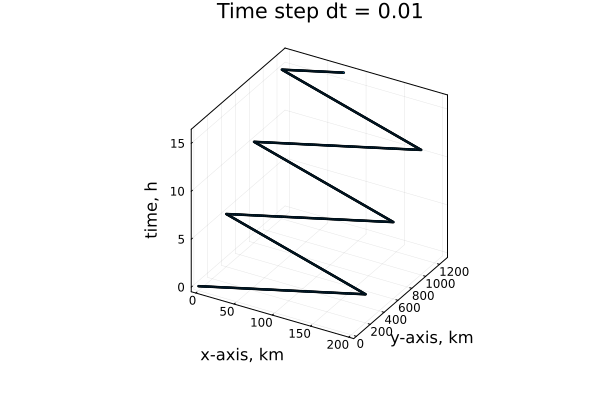

In [44]:
# passed the arguments predefined as above
car_travel_2D(V, ttot, L, 0.01)